In [34]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [8]:
# importing the dataset
data_trnsfuse = pd.read_csv('/home/achyutganti/Documents/kaggle/transfusion/transfusion.csv')

In [13]:
data_trnsfuse

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [12]:
# column summaries
data_trnsfuse.describe(include='all')

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [22]:
pd.isna(data_trnsfuse).sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [27]:
data_trnsfuse.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

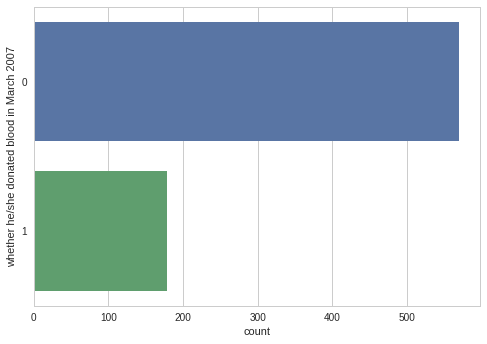

In [36]:
sns.countplot(y='whether he/she donated blood in March 2007',data=data_trnsfuse)
plt.show()

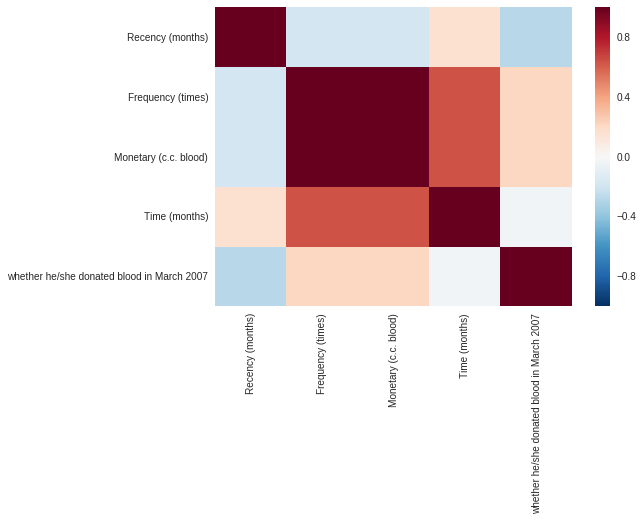

In [37]:
sns.heatmap(data_trnsfuse.corr())
plt.show()

In [46]:
# splitting the data into train and test sets.
X = data_trnsfuse.iloc[:,0:4]
y = data_trnsfuse.iloc[:,4]

In [47]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=0)

In [49]:
X_test.shape

(187, 4)

In [50]:
# Fitting Logistic Regression on the training dataset. 
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
# find out the predictions
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[129   3]
 [ 50   5]]


In [55]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.98      0.83       132
          1       0.62      0.09      0.16        55

avg / total       0.69      0.72      0.63       187



In [57]:
# Applying decision_tree to check the accuracy of the model. 
from sklearn import tree
from sklearn.metrics import accuracy_score

In [58]:
dt_model = tree.DecisionTreeClassifier()
dt_model = dt_model.fit(X_train,y_train)

In [60]:
dt_y_pred = dt_model.predict(X_test)

In [64]:
print(accuracy_score(y_test,dt_y_pred))

0.68449197861
